# Computer Vision Analysis: color image processing

In this notebook I analysed the 5 most prominent colors of each cover and classified them in order to determine if there was any difference between the most common gender of each movie and TV show.

I used *openCV* library to read the images in array format.

In [138]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
import re

%matplotlib inline

import sys
sys.path.insert(0, '../Functions')
from Functions_EDA import *

## Reading the dataset

I read the .csv file obtained from the notebook *Webscrapping the images* and took only the most relevant columns for this analysis.

In [ ]:
data = pd.read_csv('../Datasets/final_dataset_clean_coverInfo.csv',index_col=0)
data.head()

In [ ]:
data.info()

In [ ]:
data.columns

In [ ]:
df = data[['Title','Year_Release', 'Country', 'Country_Code', 'Continent',
           'RatingAverage', 'Votes', 'Genres', 'Most_Common_Gender_Cast', 
           'Most_Common_Gender_Directors', 'Cover_Image_Path']]
df.head()

## Reading the images in array format

From here, I started reading the covers in RGB array format, so I could detect the most used colors and classified them later.

To detect the colors, I used the KMeans model from *sklearn* library.

In [56]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [57]:
images = []

for item in df.index:
    images.append(get_image(df.Cover_Image_Path.iloc[item]))

In [58]:
images

[array([[[2, 2, 2],
         [0, 3, 2],
         [0, 6, 4],
         ...,
         [2, 2, 4],
         [2, 2, 4],
         [2, 2, 4]],
 
        [[3, 1, 2],
         [0, 3, 2],
         [0, 6, 4],
         ...,
         [2, 2, 4],
         [2, 2, 4],
         [2, 2, 4]],
 
        [[5, 0, 4],
         [1, 2, 4],
         [0, 6, 4],
         ...,
         [2, 2, 4],
         [2, 2, 4],
         [2, 2, 4]],
 
        ...,
 
        [[3, 3, 5],
         [3, 3, 5],
         [3, 3, 5],
         ...,
         [3, 3, 5],
         [3, 3, 5],
         [3, 3, 5]],
 
        [[3, 3, 5],
         [3, 3, 5],
         [3, 3, 5],
         ...,
         [3, 3, 5],
         [3, 3, 5],
         [3, 3, 5]],
 
        [[3, 3, 5],
         [3, 3, 5],
         [3, 3, 5],
         ...,
         [3, 3, 5],
         [3, 3, 5],
         [3, 3, 5]]], dtype=uint8),
 array([[[234, 234, 234],
         [235, 235, 235],
         [237, 237, 237],
         ...,
         [232, 238, 236],
         [226, 235, 232],
      

In [59]:
df['Cover_Image_Colors'] = images
df.head()

,Title,Year_Release,Country,Country_Code,Continent,RatingAverage,Votes,Genres,Most_Common_Gender_Cast,Most_Common_Gender_Directors,...,GREEN_Cover,BLUE_Cover,RED_Cover,YELLOW_Cover,MAGENTA_Cover,CYAN_Cover,BROWN_Cover,ORANGE_Cover,GREY_Cover,PURPLE_Cover
0,Money Heist,2017,Spain,ESP,Europe,7.1,25691.0,"TV Series, Thriller, Mystery, Heist Film, Kidn...",Men,Men,...,0,0,1,0,0,1,1,1,1,0
1,The Blacklist,2013,United States of America,USA,Americas,6.4,5148.0,"TV Series, Mystery, Drama, Crime, Spy Film",Men,Men,...,0,0,1,0,0,1,1,1,1,0
2,Locked Up,2015,Spain,ESP,Europe,7.0,6941.0,"TV Series, Thriller, Drama, Prison Drama",Women,Men,...,0,0,0,1,0,1,1,1,1,0
3,Prison Break,2005,United States of America,USA,Americas,7.3,71511.0,"TV Series, Action, Drama, Prison Drama, Cop Mo...",Men,Men,...,0,0,0,0,0,1,1,0,1,0
4,13 Reasons Why,2017,United States of America,USA,Americas,6.8,21496.0,"TV Series, Drama, Mystery, Teen/coming-of-age,...",Men,Men,...,0,0,0,0,0,1,1,0,1,0


In [48]:
def RGB2HEX(color):
    # function that will convert RGB to hex so that we can use them as labels 
    # for our pie chart.
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [54]:
def get_colors(image, number_of_colors, fig_name, show_chart=False):
    # KMeans expects the input to be of two dimensions, so we use Numpy’s reshape 
    # function to reshape the image data.
    modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
    
    # KMeans algorithm will form clusters of colors and these clusters will be our top colors. 
    # We then fit and predict on the same image to extract the prediction into the variable labels.
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)

    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), colors = hex_colors)

    return rgb_colors

In [ ]:
# top 5 colors from Money Heist cover
colors = get_colors(df.Cover_Image_Colors.iloc[0], 5, True)

In [ ]:
# top 5 colors from Money Heist cover
colors

In [ ]:
colors = []

for item in df.index:
    c = get_colors(df.Cover_Image_Colors.iloc[item], 5, False)
    colors.append(c)

In [ ]:
len(colors)

In [1]:
df['Cover_Image_Top5_Colors'] = colors
df.head()

NameError: name 'colors' is not defined

In [1]:
# Saving the information to not lose it
df.to_csv('../Datasets/final_dataset_coverColors.csv')

NameError: name 'df' is not defined

In [139]:
df = pd.read_csv('../Datasets/final_dataset_coverColors.csv',index_col=0)
df.head()

,Title,Year_Release,Country,Country_Code,Continent,RatingAverage,Votes,Genres,Most_Common_Gender_Cast,Most_Common_Gender_Directors,Cover_Image_Path,Cover_Image_Colors,Cover_Image_Top_Color,Cover_Image_Top5_Colors
0,Money Heist,2017,Spain,ESP,Europe,7.1,25691.0,"TV Series, Thriller, Mystery, Heist Film, Kidn...",Men,Men,covers/MoneyHeistTVSeries.jpg,[[[2 2 2]\n [0 3 2]\n [0 6 4]\n ...\n [2 2...,"[array([51.44381708, 39.98374906, 38.16654573])]","[array([44.60585366, 40.27210131, 36.4530394 ]..."
1,The Blacklist,2013,United States of America,USA,Americas,6.4,5148.0,"TV Series, Mystery, Drama, Crime, Spy Film",Men,Men,covers/TheBlacklistTVSeries.jpg,[[[234 234 234]\n [235 235 235]\n [237 237 2...,"[array([105.4133 , 88.02165 , 87.808633...","[array([4.0819289 , 1.642689 , 1.79175764]), ..."
2,Locked Up,2015,Spain,ESP,Europe,7.0,6941.0,"TV Series, Thriller, Drama, Prison Drama",Women,Men,covers/LockedUpTVSeries.jpg,[[[ 52 71 49]\n [ 34 53 31]\n [ 32 51 ...,"[array([110.95724603, 94.29590476, 44.258523...","[array([139.47696583, 104.59389518, 43.126177..."
3,Prison Break,2005,United States of America,USA,Americas,7.3,71511.0,"TV Series, Action, Drama, Prison Drama, Cop Mo...",Men,Men,covers/PrisonBreakTVSeries.jpg,[[[ 0 0 5]\n [ 43 46 51]\n [ 39 44 ...,"[array([151.04490287, 148.50053613, 151.094623...","[array([244.37441508, 244.96000267, 245.269151..."
4,13 Reasons Why,2017,United States of America,USA,Americas,6.8,21496.0,"TV Series, Drama, Mystery, Teen/coming-of-age,...",Men,Men,covers/ThirteenReasonsWhyTVSeries.jpg,[[[ 2 6 15]\n [ 2 6 15]\n [ 2 6 15]\n .....,"[array([29.97132584, 30.93176779, 37.90396255])]","[array([218.37710702, 213.10976088, 210.226969..."


In [140]:
for item in df.index:
    print(item)
    x = re.findall(r"[-+]?\d*\.\d+|\d+",df.Cover_Image_Top5_Colors[item])
    
    y = []
    for i in x:
        y.append(float(i))
    
    count = 0
    colorArray = []

    for j in y:
        if (len(y[count:count+3]) != 0):
            colorArray.append(y[count:count+3])
        else:
            break
        count += 3
    
    df.Cover_Image_Top5_Colors.iloc[item] = colorArray

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [141]:
COLORS = {
    'GREEN': [0, 255, 0],
    'BLUE': [0, 0, 255],
    'RED': [255, 0, 0],
    'YELLOW': [255, 255, 0],
    'MAGENTA': [255, 0, 255],
    'CYAN': [0, 255, 255],
    'BROWN': [147, 81, 22],
    'ORANGE': [255, 136, 48],
    'GREY': [178, 186, 187],
    'PURPLE': [142, 68, 173 ]
}

In [142]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10):
    
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [143]:
match_image_by_color(df.Cover_Image_Top5_Colors[0], COLORS['RED'], threshold = 60, number_of_colors = 5)

True

In [144]:
df.Cover_Image_Top5_Colors[0]

[[44.60585366, 40.27210131, 36.4530394],
 [166.17702177, 19.66397578, 29.62995531],
 [163.46017567, 159.2225696, 152.85023076],
 [13.00935439, 10.69540276, 11.71479113],
 [99.69541656, 91.56104727, 84.10537999]]

In [145]:
df['GREEN_Cover'] = 0
df['BLUE_Cover'] = 0
df['RED_Cover'] = 0
df['YELLOW_Cover'] = 0
df['MAGENTA_Cover'] = 0
df['CYAN_Cover'] = 0
df['BROWN_Cover'] = 0
df['ORANGE_Cover'] = 0
df['GREY_Cover'] = 0
df['PURPLE_Cover'] = 0

In [146]:
COLORS

{'GREEN': [0, 255, 0],
 'BLUE': [0, 0, 255],
 'RED': [255, 0, 0],
 'YELLOW': [255, 255, 0],
 'MAGENTA': [255, 0, 255],
 'CYAN': [0, 255, 255],
 'BROWN': [147, 81, 22],
 'ORANGE': [255, 136, 48],
 'GREY': [178, 186, 187],
 'PURPLE': [142, 68, 173]}

In [147]:
for item in df.index:
    print(item)
    for color in COLORS:
        match = match_image_by_color(df.Cover_Image_Top5_Colors[item], COLORS[color], threshold = 60, number_of_colors = 5)
        if match == True:
            df[color+'_Cover'][item] = 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067


In [148]:
df.head()

,Title,Year_Release,Country,Country_Code,Continent,RatingAverage,Votes,Genres,Most_Common_Gender_Cast,Most_Common_Gender_Directors,...,GREEN_Cover,BLUE_Cover,RED_Cover,YELLOW_Cover,MAGENTA_Cover,CYAN_Cover,BROWN_Cover,ORANGE_Cover,GREY_Cover,PURPLE_Cover
0,Money Heist,2017,Spain,ESP,Europe,7.1,25691.0,"TV Series, Thriller, Mystery, Heist Film, Kidn...",Men,Men,...,0,0,1,0,0,1,1,1,1,0
1,The Blacklist,2013,United States of America,USA,Americas,6.4,5148.0,"TV Series, Mystery, Drama, Crime, Spy Film",Men,Men,...,0,0,1,0,0,1,1,1,1,0
2,Locked Up,2015,Spain,ESP,Europe,7.0,6941.0,"TV Series, Thriller, Drama, Prison Drama",Women,Men,...,0,0,0,1,0,1,1,1,1,0
3,Prison Break,2005,United States of America,USA,Americas,7.3,71511.0,"TV Series, Action, Drama, Prison Drama, Cop Mo...",Men,Men,...,0,0,0,0,0,1,1,0,1,0
4,13 Reasons Why,2017,United States of America,USA,Americas,6.8,21496.0,"TV Series, Drama, Mystery, Teen/coming-of-age,...",Men,Men,...,0,0,0,0,0,1,1,0,1,0


## Exploring the data

After obtaining all the information, I did some exploratory analysis to check my hypothesis.

In [149]:
df.groupby(['Most_Common_Gender_Cast'])['GREEN_Cover'].sum()

Most_Common_Gender_Cast
Men      9
Women    0
Name: GREEN_Cover, dtype: int64

In [150]:
df.groupby(['Most_Common_Gender_Cast'])['BLUE_Cover'].sum()

Most_Common_Gender_Cast
Men      7
Women    4
Name: BLUE_Cover, dtype: int64

In [151]:
df.groupby(['Most_Common_Gender_Cast'])['RED_Cover'].sum()

Most_Common_Gender_Cast
Men      420
Women     42
Name: RED_Cover, dtype: int64

In [152]:
df.groupby(['Most_Common_Gender_Cast'])['YELLOW_Cover'].sum()

Most_Common_Gender_Cast
Men      206
Women     18
Name: YELLOW_Cover, dtype: int64

In [153]:
df.groupby(['Most_Common_Gender_Cast'])['MAGENTA_Cover'].sum()

Most_Common_Gender_Cast
Men      18
Women     6
Name: MAGENTA_Cover, dtype: int64

In [154]:
df.groupby(['Most_Common_Gender_Cast'])['CYAN_Cover'].sum()

Most_Common_Gender_Cast
Men      1723
Women     173
Name: CYAN_Cover, dtype: int64

In [155]:
df.groupby(['Most_Common_Gender_Cast'])['BROWN_Cover'].sum()

Most_Common_Gender_Cast
Men      1857
Women     195
Name: BROWN_Cover, dtype: int64

In [156]:
df.groupby(['Most_Common_Gender_Cast'])['ORANGE_Cover'].sum()

Most_Common_Gender_Cast
Men      1120
Women     120
Name: ORANGE_Cover, dtype: int64

In [157]:
df.groupby(['Most_Common_Gender_Cast'])['GREY_Cover'].sum()

Most_Common_Gender_Cast
Men      1966
Women     209
Name: GREY_Cover, dtype: int64

In [158]:
df.groupby(['Most_Common_Gender_Cast'])['PURPLE_Cover'].sum()

Most_Common_Gender_Cast
Men      598
Women     79
Name: PURPLE_Cover, dtype: int64

In [159]:
# percentage of green covers in female cast
green_w = df.groupby(['Most_Common_Gender_Cast'])['GREEN_Cover'].sum().values[1] * 100 / len(df[df.Most_Common_Gender_Cast == 'Women'])

# percentage of blue covers in female cast
blue_w = df.groupby(['Most_Common_Gender_Cast'])['BLUE_Cover'].sum().values[1] * 100 / len(df[df.Most_Common_Gender_Cast == 'Women'])

# percentage of red covers in female cast
red_w = df.groupby(['Most_Common_Gender_Cast'])['RED_Cover'].sum().values[1] * 100 / len(df[df.Most_Common_Gender_Cast == 'Women'])

# percentage of yellow covers in female cast
yellow_w = df.groupby(['Most_Common_Gender_Cast'])['YELLOW_Cover'].sum().values[1] * 100 / len(df[df.Most_Common_Gender_Cast == 'Women'])

# percentage of magenta covers in female cast
magenta_w = df.groupby(['Most_Common_Gender_Cast'])['MAGENTA_Cover'].sum().values[1] * 100 / len(df[df.Most_Common_Gender_Cast == 'Women'])

# percentage of cyan covers in female cast
cyan_w = df.groupby(['Most_Common_Gender_Cast'])['CYAN_Cover'].sum().values[1] * 100 / len(df[df.Most_Common_Gender_Cast == 'Women'])

# percentage of BROWN covers in female cast
brown_w = df.groupby(['Most_Common_Gender_Cast'])['BROWN_Cover'].sum().values[1] * 100 / len(df[df.Most_Common_Gender_Cast == 'Women'])

# percentage of orange covers in female cast
orange_w = df.groupby(['Most_Common_Gender_Cast'])['ORANGE_Cover'].sum().values[1] * 100 / len(df[df.Most_Common_Gender_Cast == 'Women'])

# percentage of grey covers in female cast
grey_w = df.groupby(['Most_Common_Gender_Cast'])['GREY_Cover'].sum().values[1] * 100 / len(df[df.Most_Common_Gender_Cast == 'Women'])

# percentage of purple covers in female cast
purple_w = df.groupby(['Most_Common_Gender_Cast'])['PURPLE_Cover'].sum().values[1] * 100 / len(df[df.Most_Common_Gender_Cast == 'Women'])

In [160]:
# size of green covers in female cast
green_s1 = df.groupby(['Most_Common_Gender_Cast'])['GREEN_Cover'].sum()[1]

# size of blue covers in female cast
blue_s1 = df.groupby(['Most_Common_Gender_Cast'])['BLUE_Cover'].sum()[1]

# size of red covers in female cast
red_s1 = df.groupby(['Most_Common_Gender_Cast'])['RED_Cover'].sum()[1]

# size of yellow covers in female cast
yellow_s1 = df.groupby(['Most_Common_Gender_Cast'])['YELLOW_Cover'].sum()[1]

# size of magenta covers in female cast
magenta_s1 = df.groupby(['Most_Common_Gender_Cast'])['MAGENTA_Cover'].sum()[1]

# size of cyan covers in female cast
cyan_s1 = df.groupby(['Most_Common_Gender_Cast'])['CYAN_Cover'].sum()[1]

# percentage of BROWN covers in female cast
brown_s1 = df.groupby(['Most_Common_Gender_Cast'])['BROWN_Cover'].sum()[1]

# percentage of orange covers in female cast
orange_s1 = df.groupby(['Most_Common_Gender_Cast'])['ORANGE_Cover'].sum()[1]

# percentage of grey covers in female cast
grey_s1 = df.groupby(['Most_Common_Gender_Cast'])['GREY_Cover'].sum()[1]

# percentage of purple covers in female cast
purple_s1 = df.groupby(['Most_Common_Gender_Cast'])['PURPLE_Cover'].sum()[1]

In [161]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(
    x=['green','blue','red','yellow','magenta','cyan','brown','orange','grey','purple'],
    y=[green_w,blue_w,red_w,yellow_w,magenta_w,cyan_w,brown_w,orange_w,grey_w,purple_w],
    mode='markers',
    marker=dict(
        color=['green','blue','red','yellow','magenta','cyan','brown','orange','grey','purple'],
        size = 50
        #size=[green_s,blue_s,red_s,yellow_s,magenta_s,cyan_s,black_s,white_s]
        ),
    opacity = 0.8
)])

fig.update_layout(
    title = 'Proportion of colors where female cast is most common gender',
    )

fig.show()

In [162]:
# percentage of green covers in male cast
green_m = df.groupby(['Most_Common_Gender_Cast'])['GREEN_Cover'].sum().values[0] * 100 / len(df[df.Most_Common_Gender_Cast == 'Men'])

# percentage of blue covers in male cast
blue_m = df.groupby(['Most_Common_Gender_Cast'])['BLUE_Cover'].sum().values[0] * 100 / len(df[df.Most_Common_Gender_Cast == 'Men'])

# percentage of red covers in male cast
red_m = df.groupby(['Most_Common_Gender_Cast'])['RED_Cover'].sum().values[0] * 100 / len(df[df.Most_Common_Gender_Cast == 'Men'])

# percentage of yellow covers in male cast
yellow_m = df.groupby(['Most_Common_Gender_Cast'])['YELLOW_Cover'].sum().values[0] * 100 / len(df[df.Most_Common_Gender_Cast == 'Men'])

# percentage of magenta covers in male cast
magenta_m = df.groupby(['Most_Common_Gender_Cast'])['MAGENTA_Cover'].sum().values[0] * 100 / len(df[df.Most_Common_Gender_Cast == 'Men'])

# percentage of cyan covers in male cast
cyan_m = df.groupby(['Most_Common_Gender_Cast'])['CYAN_Cover'].sum().values[0] * 100 / len(df[df.Most_Common_Gender_Cast == 'Men'])

# percentage of BROWN covers in male cast
brown_m = df.groupby(['Most_Common_Gender_Cast'])['BROWN_Cover'].sum().values[0] * 100 / len(df[df.Most_Common_Gender_Cast == 'Men'])

# percentage of orange covers in male cast
orange_m = df.groupby(['Most_Common_Gender_Cast'])['ORANGE_Cover'].sum().values[0] * 100 / len(df[df.Most_Common_Gender_Cast == 'Men'])

# percentage of grey covers in male cast
grey_m = df.groupby(['Most_Common_Gender_Cast'])['GREY_Cover'].sum().values[0] * 100 / len(df[df.Most_Common_Gender_Cast == 'Men'])

# percentage of purple covers in male cast
purple_m = df.groupby(['Most_Common_Gender_Cast'])['PURPLE_Cover'].sum().values[0] * 100 / len(df[df.Most_Common_Gender_Cast == 'Men'])

In [163]:
# size of green covers in male cast
green_s0 = df.groupby(['Most_Common_Gender_Cast'])['GREEN_Cover'].sum()[0]

# size of blue covers in male cast
blue_s0 = df.groupby(['Most_Common_Gender_Cast'])['BLUE_Cover'].sum()[0]

# size of red covers in male cast
red_s0 = df.groupby(['Most_Common_Gender_Cast'])['RED_Cover'].sum()[0]

# size of yellow covers in male cast
yellow_s0 = df.groupby(['Most_Common_Gender_Cast'])['YELLOW_Cover'].sum()[0]

# size of magenta covers in male cast
magenta_s0 = df.groupby(['Most_Common_Gender_Cast'])['MAGENTA_Cover'].sum()[0]

# size of cyan covers in male cast
cyan_s0 = df.groupby(['Most_Common_Gender_Cast'])['CYAN_Cover'].sum()[0]

# percentage of BROWN covers in male cast
brown_s0 = df.groupby(['Most_Common_Gender_Cast'])['BROWN_Cover'].sum()[0]

# percentage of orange covers in male cast
orange_s0 = df.groupby(['Most_Common_Gender_Cast'])['ORANGE_Cover'].sum()[0]

# percentage of grey covers in male cast
grey_s0 = df.groupby(['Most_Common_Gender_Cast'])['GREY_Cover'].sum()[0]

# percentage of purple covers in male cast
purple_s0 = df.groupby(['Most_Common_Gender_Cast'])['PURPLE_Cover'].sum()[0]

In [164]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(
    x=['green','blue','red','yellow','magenta','cyan','brown','orange','grey','purple'],
    y=[green_m,blue_m,red_m,yellow_m,magenta_m,cyan_m,brown_m,orange_m,grey_m,purple_m],
    mode='markers',
    marker=dict(
        color=['green','blue','red','yellow','magenta','cyan','brown','orange','grey','purple'],
        size = 50
        #size=[green_s,blue_s,red_s,yellow_s,magenta_s,cyan_s,black_s,white_s]
        ),
    opacity = 0.8
)])

fig.update_layout(
    title = 'Proportion of colors where male cast is most common gender',
    )

fig.show()

In [165]:
import plotly.graph_objects as go

trace_1 = go.Bar(
    x=df.groupby(['Most_Common_Gender_Cast'])['GREEN_Cover'].sum().keys(),
    y=[green_m,green_w],
    opacity = 0.8,
    name = 'Green',
    marker_color = 'rgb(0, 255, 0)',
    text = df.groupby(['Most_Common_Gender_Cast'])['GREEN_Cover'].sum()
)

trace_2 = go.Bar(
    x=df.groupby(['Most_Common_Gender_Cast'])['BLUE_Cover'].sum().keys(),
    y=[blue_m,blue_w],
    opacity = 0.8,
    name = 'Blue',
    marker_color = 'rgb(0, 0, 255)',
    text = df.groupby(['Most_Common_Gender_Cast'])['BLUE_Cover'].sum()
)

trace_3 = go.Bar(
    x=df.groupby(['Most_Common_Gender_Cast'])['RED_Cover'].sum().keys(),
    y=[red_m,red_w],
    opacity = 0.8,
    name = 'Red',
    marker_color = 'rgb(255, 0, 0)',
    text = df.groupby(['Most_Common_Gender_Cast'])['RED_Cover'].sum()
)

trace_4 = go.Bar(
    x=df.groupby(['Most_Common_Gender_Cast'])['YELLOW_Cover'].sum().keys(),
    y=[yellow_m,yellow_w],
    opacity = 0.8,
    name = 'Yellow',
    marker_color = 'rgb(255, 255, 0)',
    text = df.groupby(['Most_Common_Gender_Cast'])['YELLOW_Cover'].sum()
)

trace_5 = go.Bar(
    x=df.groupby(['Most_Common_Gender_Cast'])['MAGENTA_Cover'].sum().keys(),
    y=[magenta_m,magenta_w],
    opacity = 0.8,
    name = 'Magenta',
    marker_color = 'rgb(255, 0, 255)',
    text = df.groupby(['Most_Common_Gender_Cast'])['MAGENTA_Cover'].sum()
)

trace_6 = go.Bar(
    x=df.groupby(['Most_Common_Gender_Cast'])['CYAN_Cover'].sum().keys(),
    y=[cyan_m,cyan_w],
    opacity = 0.8,
    name = 'Cyan',
    marker_color = 'rgb(0, 255, 255)',
    text = df.groupby(['Most_Common_Gender_Cast'])['CYAN_Cover'].sum()
)

trace_7 = go.Bar(
    x=df.groupby(['Most_Common_Gender_Cast'])['BROWN_Cover'].sum().keys(),
    y=[brown_m,brown_w],
    opacity = 0.8,
    name = 'Brown',
    marker_color = 'rgb(147, 81, 22)',
    text = df.groupby(['Most_Common_Gender_Cast'])['BROWN_Cover'].sum()
)

trace_8 = go.Bar(
    x=df.groupby(['Most_Common_Gender_Cast'])['ORANGE_Cover'].sum().keys(),
    y=[orange_m,orange_w],
    opacity = 0.8,
    name = 'Orange',
    marker_color = 'rgb(255, 136, 48)',
    text = df.groupby(['Most_Common_Gender_Cast'])['ORANGE_Cover'].sum()
)

trace_9 = go.Bar(
    x=df.groupby(['Most_Common_Gender_Cast'])['GREY_Cover'].sum().keys(),
    y=[grey_m,grey_w],
    opacity = 0.8,
    name = 'Grey',
    marker_color = 'rgb(178, 186, 187)',
    text = df.groupby(['Most_Common_Gender_Cast'])['GREY_Cover'].sum()
)

trace_10 = go.Bar(
    x=df.groupby(['Most_Common_Gender_Cast'])['PURPLE_Cover'].sum().keys(),
    y=[purple_m,purple_w],
    opacity = 0.8,
    name = 'Purple',
    marker_color = 'rgb(142, 68, 173)',
    text = df.groupby(['Most_Common_Gender_Cast'])['PURPLE_Cover'].sum()
)

traces = [trace_2, trace_1, trace_3, trace_4, trace_5, trace_6, trace_7, trace_8, trace_9, trace_10]
layout = go.Layout(barmode='group',
                   title={
                    'text': "Distribution of cover colors by gender in CAST",
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                   yaxis=dict( title='Count',),
                   paper_bgcolor='white',
                   legend=dict(
                    x=1,
                    y=1,
                    bgcolor='rgba(255, 255, 255, 0)',
                    bordercolor='rgba(255, 255, 255, 0)'
                    ),
                   uniformtext_minsize=1, 
                   uniformtext_mode='show',
)

fig1 = go.Figure(data=traces, layout=layout)
iplot(fig1)

In [166]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Bar(
    x=['green','blue','red','yellow','magenta','cyan','brown','orange','grey','purple'],
    y=[green_m-green_w,blue_m-blue_w,red_m-red_w,yellow_m-yellow_w,magenta_m-magenta_w,
       cyan_m-cyan_w,brown_m-brown_w,orange_m-orange_w,grey_m-grey_w,purple_m-purple_w],
    opacity = 0.7,
    name = 'Purple',
    marker=dict(
        color=['green','blue','red','yellow','magenta','cyan','brown','orange','grey','purple'],
        ),
)])

fig.update_layout(
    title={
                    'text': "Difference between percentage of colors by gender in CAST",
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
    )

fig.show()

In [167]:
# percentage of green covers in female directors
green_w = df.groupby(['Most_Common_Gender_Directors'])['GREEN_Cover'].sum().values[1] * 100 / len(df[df.Most_Common_Gender_Directors == 'Women'])

# percentage of blue covers in female directors
blue_w = df.groupby(['Most_Common_Gender_Directors'])['BLUE_Cover'].sum().values[1] * 100 / len(df[df.Most_Common_Gender_Directors == 'Women'])

# percentage of red covers in female directors
red_w = df.groupby(['Most_Common_Gender_Directors'])['RED_Cover'].sum().values[1] * 100 / len(df[df.Most_Common_Gender_Directors == 'Women'])

# percentage of yellow covers in female directors
yellow_w = df.groupby(['Most_Common_Gender_Directors'])['YELLOW_Cover'].sum().values[1] * 100 / len(df[df.Most_Common_Gender_Directors == 'Women'])

# percentage of magenta covers in female directors
magenta_w = df.groupby(['Most_Common_Gender_Directors'])['MAGENTA_Cover'].sum().values[1] * 100 / len(df[df.Most_Common_Gender_Directors == 'Women'])

# percentage of cyan covers in female directors
cyan_w = df.groupby(['Most_Common_Gender_Directors'])['CYAN_Cover'].sum().values[1] * 100 / len(df[df.Most_Common_Gender_Directors == 'Women'])

# percentage of BROWN covers in female directors
brown_w = df.groupby(['Most_Common_Gender_Directors'])['BROWN_Cover'].sum().values[1] * 100 / len(df[df.Most_Common_Gender_Directors == 'Women'])

# percentage of orange covers in female directors
orange_w = df.groupby(['Most_Common_Gender_Directors'])['ORANGE_Cover'].sum().values[1] * 100 / len(df[df.Most_Common_Gender_Directors == 'Women'])

# percentage of grey covers in female directors
grey_w = df.groupby(['Most_Common_Gender_Directors'])['GREY_Cover'].sum().values[1] * 100 / len(df[df.Most_Common_Gender_Directors == 'Women'])

# percentage of purple covers in female directors
purple_w = df.groupby(['Most_Common_Gender_Directors'])['PURPLE_Cover'].sum().values[1] * 100 / len(df[df.Most_Common_Gender_Directors == 'Women'])

In [168]:
# size of green covers in female directors
green_s1 = df.groupby(['Most_Common_Gender_Directors'])['GREEN_Cover'].sum()[1]

# size of blue covers in female directors
blue_s1 = df.groupby(['Most_Common_Gender_Directors'])['BLUE_Cover'].sum()[1]

# size of red covers in female directors
red_s1 = df.groupby(['Most_Common_Gender_Directors'])['RED_Cover'].sum()[1]

# size of yellow covers in female directors
yellow_s1 = df.groupby(['Most_Common_Gender_Directors'])['YELLOW_Cover'].sum()[1]

# size of magenta covers in female directors
magenta_s1 = df.groupby(['Most_Common_Gender_Directors'])['MAGENTA_Cover'].sum()[1]

# size of cyan covers in female directors
cyan_s1 = df.groupby(['Most_Common_Gender_Directors'])['CYAN_Cover'].sum()[1]

# percentage of BROWN covers in female directors
brown_s1 = df.groupby(['Most_Common_Gender_Directors'])['BROWN_Cover'].sum()[1]

# percentage of orange covers in female directors
orange_s1 = df.groupby(['Most_Common_Gender_Directors'])['ORANGE_Cover'].sum()[1]

# percentage of grey covers in female directors
grey_s1 = df.groupby(['Most_Common_Gender_Directors'])['GREY_Cover'].sum()[1]

# percentage of purple covers in female directors
purple_s1 = df.groupby(['Most_Common_Gender_Directors'])['PURPLE_Cover'].sum()[1]

In [169]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(
    x=['green','blue','red','yellow','magenta','cyan','brown','orange','grey','purple'],
    y=[green_w,blue_w,red_w,yellow_w,magenta_w,cyan_w,brown_w,orange_w,grey_w,purple_w],
    mode='markers',
    marker=dict(
        color=['green','blue','red','yellow','magenta','cyan','brown','orange','grey','purple'],
        size = 50
        #size=[green_s,blue_s,red_s,yellow_s,magenta_s,cyan_s,black_s,white_s]
        ),
    opacity = 0.8
)])

fig.update_layout(
    title = 'Proportion of colors where female directors is most common gender',
    )

fig.show()

In [170]:
# percentage of green covers in male directors
green_m = df.groupby(['Most_Common_Gender_Directors'])['GREEN_Cover'].sum().values[0] * 100 / len(df[df.Most_Common_Gender_Cast == 'Men'])

# percentage of blue covers in male directors
blue_m = df.groupby(['Most_Common_Gender_Directors'])['BLUE_Cover'].sum().values[0] * 100 / len(df[df.Most_Common_Gender_Directors == 'Men'])

# percentage of red covers in male directors
red_m = df.groupby(['Most_Common_Gender_Directors'])['RED_Cover'].sum().values[0] * 100 / len(df[df.Most_Common_Gender_Directors == 'Men'])

# percentage of yellow covers in male directors
yellow_m = df.groupby(['Most_Common_Gender_Directors'])['YELLOW_Cover'].sum().values[0] * 100 / len(df[df.Most_Common_Gender_Directors == 'Men'])

# percentage of magenta covers in male directors
magenta_m = df.groupby(['Most_Common_Gender_Directors'])['MAGENTA_Cover'].sum().values[0] * 100 / len(df[df.Most_Common_Gender_Directors == 'Men'])

# percentage of cyan covers in male directors
cyan_m = df.groupby(['Most_Common_Gender_Directors'])['CYAN_Cover'].sum().values[0] * 100 / len(df[df.Most_Common_Gender_Directors == 'Men'])

# percentage of BROWN covers in male directors
brown_m = df.groupby(['Most_Common_Gender_Directors'])['BROWN_Cover'].sum().values[0] * 100 / len(df[df.Most_Common_Gender_Directors == 'Men'])

# percentage of orange covers in male directors
orange_m = df.groupby(['Most_Common_Gender_Directors'])['ORANGE_Cover'].sum().values[0] * 100 / len(df[df.Most_Common_Gender_Directors == 'Men'])

# percentage of grey covers in male directors
grey_m = df.groupby(['Most_Common_Gender_Directors'])['GREY_Cover'].sum().values[0] * 100 / len(df[df.Most_Common_Gender_Directors == 'Men'])

# percentage of purple covers in male directors
purple_m = df.groupby(['Most_Common_Gender_Directors'])['PURPLE_Cover'].sum().values[0] * 100 / len(df[df.Most_Common_Gender_Directors == 'Men'])

In [171]:
# size of green covers in male directors
green_s0 = df.groupby(['Most_Common_Gender_Directors'])['GREEN_Cover'].sum()[0]

# size of blue covers in male directors
blue_s0 = df.groupby(['Most_Common_Gender_Directors'])['BLUE_Cover'].sum()[0]

# size of red covers in male directors
red_s0 = df.groupby(['Most_Common_Gender_Directors'])['RED_Cover'].sum()[0]

# size of yellow covers in male directors
yellow_s0 = df.groupby(['Most_Common_Gender_Directors'])['YELLOW_Cover'].sum()[0]

# size of magenta covers in male directors
magenta_s0 = df.groupby(['Most_Common_Gender_Directors'])['MAGENTA_Cover'].sum()[0]

# size of cyan covers in male directors
cyan_s0 = df.groupby(['Most_Common_Gender_Directors'])['CYAN_Cover'].sum()[0]

# percentage of BROWN covers in male directors
brown_s0 = df.groupby(['Most_Common_Gender_Directors'])['BROWN_Cover'].sum()[0]

# percentage of orange covers in male directors
orange_s0 = df.groupby(['Most_Common_Gender_Directors'])['ORANGE_Cover'].sum()[0]

# percentage of grey covers in male directors
grey_s0 = df.groupby(['Most_Common_Gender_Directors'])['GREY_Cover'].sum()[0]

# percentage of purple covers in male directors
purple_s0 = df.groupby(['Most_Common_Gender_Directors'])['PURPLE_Cover'].sum()[0]

In [172]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(
    x=['green','blue','red','yellow','magenta','cyan','brown','orange','grey','purple'],
    y=[green_m,blue_m,red_m,yellow_m,magenta_m,cyan_m,brown_m,orange_m,grey_m,purple_m],
    mode='markers',
    marker=dict(
        color=['green','blue','red','yellow','magenta','cyan','brown','orange','grey','purple'],
        size = 50
        #size=[green_s,blue_s,red_s,yellow_s,magenta_s,cyan_s,black_s,white_s]
        ),
    opacity = 0.8
)])

fig.update_layout(
    title = 'Proportion of colors where male directors is most common gender',
    )

fig.show()

In [173]:
import plotly.graph_objects as go

trace_1 = go.Bar(
    x=df.groupby(['Most_Common_Gender_Directors'])['GREEN_Cover'].sum().keys(),
    y=[green_m,green_w],
    opacity = 0.8,
    name = 'Green',
    marker_color = 'rgb(0, 255, 0)',
    text = df.groupby(['Most_Common_Gender_Directors'])['GREEN_Cover'].sum()
)

trace_2 = go.Bar(
    x=df.groupby(['Most_Common_Gender_Directors'])['BLUE_Cover'].sum().keys(),
    y=[blue_m,blue_w],
    opacity = 0.8,
    name = 'Blue',
    marker_color = 'rgb(0, 0, 255)',
    text = df.groupby(['Most_Common_Gender_Directors'])['BLUE_Cover'].sum()
)

trace_3 = go.Bar(
    x=df.groupby(['Most_Common_Gender_Directors'])['RED_Cover'].sum().keys(),
    y=[red_m,red_w],
    opacity = 0.8,
    name = 'Red',
    marker_color = 'rgb(255, 0, 0)',
    text = df.groupby(['Most_Common_Gender_Directors'])['RED_Cover'].sum()
)

trace_4 = go.Bar(
    x=df.groupby(['Most_Common_Gender_Directors'])['YELLOW_Cover'].sum().keys(),
    y=[yellow_m,yellow_w],
    opacity = 0.8,
    name = 'Yellow',
    marker_color = 'rgb(255, 255, 0)',
    text = df.groupby(['Most_Common_Gender_Directors'])['YELLOW_Cover'].sum()
)

trace_5 = go.Bar(
    x=df.groupby(['Most_Common_Gender_Directors'])['MAGENTA_Cover'].sum().keys(),
    y=[magenta_m,magenta_w],
    opacity = 0.8,
    name = 'Magenta',
    marker_color = 'rgb(255, 0, 255)',
    text = df.groupby(['Most_Common_Gender_Directors'])['MAGENTA_Cover'].sum()
)

trace_6 = go.Bar(
    x=df.groupby(['Most_Common_Gender_Directors'])['CYAN_Cover'].sum().keys(),
    y=[cyan_m,cyan_w],
    opacity = 0.8,
    name = 'Cyan',
    marker_color = 'rgb(0, 255, 255)',
    text = df.groupby(['Most_Common_Gender_Directors'])['CYAN_Cover'].sum()
)

trace_7 = go.Bar(
    x=df.groupby(['Most_Common_Gender_Directors'])['BROWN_Cover'].sum().keys(),
    y=[brown_m,brown_w],
    opacity = 0.8,
    name = 'Brown',
    marker_color = 'rgb(147, 81, 22)',
    text = df.groupby(['Most_Common_Gender_Directors'])['BROWN_Cover'].sum()
)

trace_8 = go.Bar(
    x=df.groupby(['Most_Common_Gender_Directors'])['ORANGE_Cover'].sum().keys(),
    y=[orange_m,orange_w],
    opacity = 0.8,
    name = 'Orange',
    marker_color = 'rgb(255, 136, 48)',
    text = df.groupby(['Most_Common_Gender_Directors'])['ORANGE_Cover'].sum()
)

trace_9 = go.Bar(
    x=df.groupby(['Most_Common_Gender_Directors'])['GREY_Cover'].sum().keys(),
    y=[grey_m,grey_w],
    opacity = 0.8,
    name = 'Grey',
    marker_color = 'rgb(178, 186, 187)',
    text = df.groupby(['Most_Common_Gender_Directors'])['GREY_Cover'].sum()
)

trace_10 = go.Bar(
    x=df.groupby(['Most_Common_Gender_Directors'])['PURPLE_Cover'].sum().keys(),
    y=[purple_m,purple_w],
    opacity = 0.8,
    name = 'Purple',
    marker_color = 'rgb(142, 68, 173)',
    text = df.groupby(['Most_Common_Gender_Directors'])['PURPLE_Cover'].sum()
)

traces = [trace_2, trace_1, trace_3, trace_4, trace_5, trace_6, trace_7, trace_8, trace_9, trace_10]
layout = go.Layout(barmode='group',
                   title={
                    'text': "Distribution of cover colors by gender in DIRECTION",
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                   yaxis=dict( title='Count',),
                   paper_bgcolor='white',
                   legend=dict(
                    x=1,
                    y=1,
                    bgcolor='rgba(255, 255, 255, 0)',
                    bordercolor='rgba(255, 255, 255, 0)'
                    ),
                   uniformtext_minsize=1, 
                   uniformtext_mode='show',
)

fig1 = go.Figure(data=traces, layout=layout)
iplot(fig1)

In [174]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Bar(
    x=['green','blue','red','yellow','magenta','cyan','brown','orange','grey','purple'],
    y=[green_m-green_w,blue_m-blue_w,red_m-red_w,yellow_m-yellow_w,magenta_m-magenta_w,
       cyan_m-cyan_w,brown_m-brown_w,orange_m-orange_w,grey_m-grey_w,purple_m-purple_w],
    opacity = 0.7,
    name = 'Purple',
    marker=dict(
        color=['green','blue','red','yellow','magenta','cyan','brown','orange','grey','purple'],
        ),
)])

fig.update_layout(
    title={
                    'text': "Difference between percentage of colors by gender in DIRECTION",
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
    )

fig.show()

In [40]:
df.groupby(['Year_Release'])['GREEN_Cover'].mean()

Year_Release
1945    0.000000
1961    0.000000
1972    0.000000
1978    0.000000
1979    0.000000
1980    0.000000
1981    0.000000
1982    0.000000
1984    0.000000
1986    0.000000
1987    0.000000
1988    0.000000
1989    0.000000
1990    0.000000
1991    0.000000
1993    0.000000
1994    0.000000
1995    0.000000
1996    0.000000
1997    0.000000
1998    0.000000
1999    0.000000
2000    0.000000
2001    0.000000
2002    0.000000
2003    0.071429
2004    0.000000
2005    0.000000
2006    0.000000
2007    0.000000
2008    0.000000
2009    0.000000
2010    0.023810
2011    0.000000
2012    0.000000
2013    0.017857
2014    0.000000
2015    0.009434
2016    0.013514
2017    0.000000
2018    0.000000
2019    0.003472
2020    0.003378
Name: GREEN_Cover, dtype: float64

In [51]:
COLORS.keys()

dict_keys(['GREEN', 'BLUE', 'RED', 'YELLOW', 'MAGENTA', 'CYAN', 'BROWN', 'ORANGE', 'GREY', 'PURPLE'])

In [52]:
def getList(dict): 
    list = [] 
    for key in dict.keys(): 
        list.append(key) 
          
    return list

In [53]:
getList(COLORS)[0]

'GREEN'

In [54]:
fig = go.Figure()

for color in getList(COLORS):
    x, y = [],[]
    for item in df.groupby(['Year_Release'])[color+'_Cover'].mean().index:
        if (df.groupby(['Year_Release'])[color+'_Cover'].mean()[item] > 0) == True:
            if item >= 2005:
                x.append(item)
                y.append(df.groupby(['Year_Release'])[color+'_Cover'].mean()[item] *100)
    
    fig.add_trace(go.Scatter(
        x=x, y=y,
        mode='lines+markers',
        marker_color=color.lower(),
        opacity=0.6,
        name = color.lower())
        )

fig.update_layout(
    title='Color evolution of covers during the last 15 years',
    yaxis=dict(
        title='Color Ratio',
    ),
    xaxis=dict(
        title='Year',
    ),
)

fig.show()

In [55]:
df.head()

,Title,Year_Release,Country,Country_Code,Continent,RatingAverage,Votes,Genres,Most_Common_Gender_Cast,Most_Common_Gender_Directors,...,GREEN_Cover,BLUE_Cover,RED_Cover,YELLOW_Cover,MAGENTA_Cover,CYAN_Cover,BROWN_Cover,ORANGE_Cover,GREY_Cover,PURPLE_Cover
0,Money Heist,2017,Spain,ESP,Europe,7.1,25691.0,"TV Series, Thriller, Mystery, Heist Film, Kidn...",Men,Men,...,0,0,1,0,0,1,1,1,1,0
1,The Blacklist,2013,United States of America,USA,Americas,6.4,5148.0,"TV Series, Mystery, Drama, Crime, Spy Film",Men,Men,...,0,0,1,0,0,1,1,1,1,0
2,Locked Up,2015,Spain,ESP,Europe,7.0,6941.0,"TV Series, Thriller, Drama, Prison Drama",Women,Men,...,0,0,0,1,0,1,1,1,1,0
3,Prison Break,2005,United States of America,USA,Americas,7.3,71511.0,"TV Series, Action, Drama, Prison Drama, Cop Mo...",Men,Men,...,0,0,0,0,0,1,1,0,1,0
4,13 Reasons Why,2017,United States of America,USA,Americas,6.8,21496.0,"TV Series, Drama, Mystery, Teen/coming-of-age,...",Men,Men,...,0,0,0,0,0,1,1,0,1,0


In [56]:
df.groupby(['Continent']).mean()

,Year_Release,RatingAverage,Votes,GREEN_Cover,BLUE_Cover,RED_Cover,YELLOW_Cover,MAGENTA_Cover,CYAN_Cover,BROWN_Cover,ORANGE_Cover,GREY_Cover,PURPLE_Cover
Continent,,,,,,,,,,,,,
Africa,2019.250000,5.300000,56.000000,0.000000,0.000000,0.250000,0.000000,0.000000,1.000000,1.000000,0.250000,1.000000,0.500000
Americas,2015.358327,5.799064,9610.210213,0.003946,0.005525,0.234412,0.102605,0.011839,0.851618,0.932912,0.599842,0.992897,0.328335
Asia,2014.827273,6.461905,3304.624339,0.009091,0.004545,0.200000,0.095455,0.004545,0.886364,0.927273,0.536364,1.000000,0.363636
Europe,2016.781297,5.908266,5236.118314,0.003017,0.001508,0.173454,0.107089,0.007541,0.891403,0.954751,0.517345,0.998492,0.254902
Oceania,2015.156250,5.893333,19642.766667,0.000000,0.062500,0.156250,0.062500,0.093750,0.843750,0.906250,0.562500,0.968750,0.312500


In [57]:
fig = go.Figure()

for color in getList(COLORS):
    x, y = [],[]
    for item in df.groupby(['Continent'])[color+'_Cover'].mean().index:
        if (df.groupby(['Continent'])[color+'_Cover'].mean()[item] > 0) == True:
            x.append(item)
            y.append(df.groupby(['Continent'])[color+'_Cover'].mean()[item] * 100)
    
    fig.add_trace(go.Bar(
        x=x, y=y,
        marker_color=color.lower(),
        opacity=0.6,
        name = color.lower()),
        )

fig.update_layout(
    barmode='stack',
    title='Color ratio of covers by Continent',
)

fig.update_yaxes(showticklabels=False)

fig.show()

In [50]:
df.head(2)

,Title,Year_Release,Country,Country_Code,Continent,RatingAverage,Votes,Genres,Most_Common_Gender_Cast,Most_Common_Gender_Directors,...,GREEN_Cover,BLUE_Cover,RED_Cover,YELLOW_Cover,MAGENTA_Cover,CYAN_Cover,BROWN_Cover,ORANGE_Cover,GREY_Cover,PURPLE_Cover
0,Money Heist,2017,Spain,ESP,Europe,7.1,25691.0,"TV Series, Thriller, Mystery, Heist Film, Kidn...",Men,Men,...,0,0,1,0,0,1,1,1,1,0
1,The Blacklist,2013,United States of America,USA,Americas,6.4,5148.0,"TV Series, Mystery, Drama, Crime, Spy Film",Men,Men,...,0,0,1,0,0,1,1,1,1,0


In [52]:
df[df.Most_Common_Gender_Cast == 'Women'].sort_values(by='Votes', ascending=False).head()

,Title,Year_Release,Country,Country_Code,Continent,RatingAverage,Votes,Genres,Most_Common_Gender_Cast,Most_Common_Gender_Directors,...,GREEN_Cover,BLUE_Cover,RED_Cover,YELLOW_Cover,MAGENTA_Cover,CYAN_Cover,BROWN_Cover,ORANGE_Cover,GREY_Cover,PURPLE_Cover
86,How I Met Your Mother,2005,United States of America,USA,Americas,7.6,94562.0,"TV Series, Comedy, Sitcom, Friendship",Women,Men,...,0,0,0,0,0,1,1,0,1,0
88,The Fresh Prince of Bel-Air,1990,United States of America,USA,Americas,7.0,86622.0,"TV Series, Comedy, Family Sitcom, Family Relat...",Women,Women,...,0,0,1,1,0,0,1,1,1,1
673,Mamma Mia!,2008,United Kingdom of Great Britain and Northern I...,GBR,Europe,5.8,36577.0,"Musical, Comedy, Romance, Music, Weddings",Women,Women,...,0,0,0,0,0,1,1,1,1,1
529,Matilda,1996,United States of America,USA,Americas,5.9,28345.0,"Comedy, Fantasy, Kids, Family Relationships, F...",Women,Men,...,0,0,0,0,0,1,1,1,1,0
986,Annihilation,2018,United Kingdom of Great Britain and Northern I...,GBR,Europe,6.1,24355.0,"Sci-Fi, Thriller, Psychological Thriller",Women,Men,...,0,0,0,0,0,1,0,0,1,1


[array([202.9292141 , 232.06163941, 231.13545757]),
 array([147.49834149, 137.73779814, 132.84141526]),
 array([ 75.71446888, 200.58779409, 202.90345535]),
 array([28.83286788, 34.566058  , 37.17455885]),
 array([132.6748544 , 213.80538179, 212.78230155])]

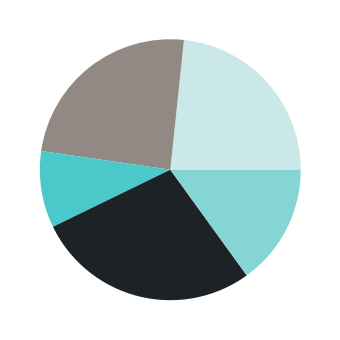

In [63]:
get_colors(df.Cover_Image_Colors.iloc[86], 5, 'HIMYM_pie_women', True)

[array([216.96795464, 203.45812684,  43.21679966]),
 array([ 91.67059553, 116.10258995, 154.07397643]),
 array([205.42971765,  52.43225675,  44.89782653]),
 array([229.54227908, 209.99954636, 172.26029759]),
 array([20.07791353, 19.84808691, 31.6373546 ])]

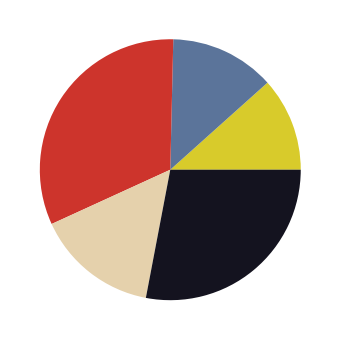

In [64]:
get_colors(df.Cover_Image_Colors.iloc[88], 5, 'Prince_Bel-Air_pie_women', True)

[array([237.6975408 , 234.96224011, 236.52544154]),
 array([52.55149502, 63.94525823, 85.15576865]),
 array([171.48225258,  74.68317127,  90.51530156]),
 array([206.86648969, 178.70128865, 178.41441292]),
 array([148.07735079, 184.62997175, 206.81646563])]

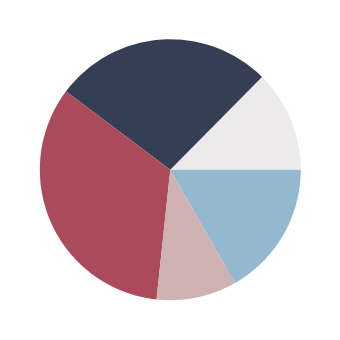

In [65]:
get_colors(df.Cover_Image_Colors.iloc[673], 5, 'Mamma_mia_pie_women', True)

[array([ 89.08004269, 138.27167082, 116.90620183]),
 array([ 8.91299858, 73.33988333, 99.70287772]),
 array([15.9959438 , 24.88958351, 40.88943715]),
 array([201.33106976, 168.38305847, 132.65852368]),
 array([142.26808792,  70.3567588 ,  55.92557306])]

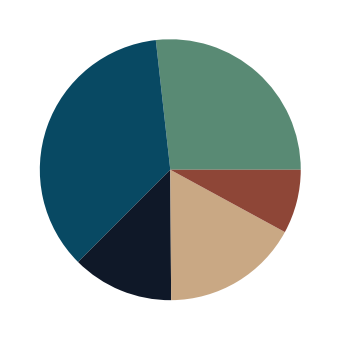

In [66]:
get_colors(df.Cover_Image_Colors.iloc[529], 5, 'Matilda_pie_women', True)

[array([42.68123285, 56.13144747, 67.60403912]),
 array([ 62.87438164, 100.01538129, 138.26548266]),
 array([ 8.49798009, 11.61654783, 15.45612486]),
 array([118.85467452, 140.34171573, 160.21212788]),
 array([207.70507767, 211.95849757, 213.20658474])]

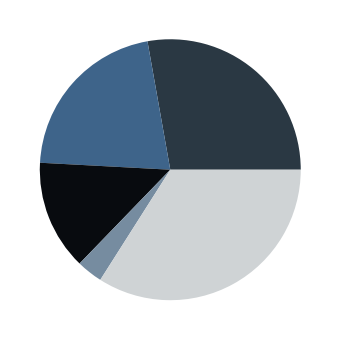

In [67]:
get_colors(df.Cover_Image_Colors.iloc[986], 5, 'Annihilation_pie_women', True)

In [68]:
df[df.Most_Common_Gender_Cast == 'Men'].sort_values(by='Votes', ascending=False).head()

,Title,Year_Release,Country,Country_Code,Continent,RatingAverage,Votes,Genres,Most_Common_Gender_Cast,Most_Common_Gender_Directors,...,GREEN_Cover,BLUE_Cover,RED_Cover,YELLOW_Cover,MAGENTA_Cover,CYAN_Cover,BROWN_Cover,ORANGE_Cover,GREY_Cover,PURPLE_Cover
890,Pulp Fiction,1994,United States of America,USA,Americas,8.6,197246.0,"Thriller, Crimen, Historias cruzadas, Película...",Men,Men,...,0,0,1,1,0,0,1,1,1,1
682,Forrest Gump,1994,United States of America,USA,Americas,8.2,196637.0,"Comedia, Drama, Romance, Años 60, Años 70, Dis...",Men,Men,...,0,0,0,0,0,1,1,0,1,1
750,The Matrix,1999,United States of America,USA,Americas,7.9,190047.0,"Ciencia ficción, Fantástico, Acción, Thriller,...",Men,Women,...,0,0,0,0,0,1,1,0,1,1
729,The Lord of the Rings: The Fellowship of the Ring,2001,New Zealand,NZL,Oceania,8.0,186849.0,"Fantasy, Adventure, Action, Medieval Fantasy, ...",Men,Men,...,0,0,0,0,0,1,1,0,1,0
834,Kill Bill: Vol. 1,2003,United States of America,USA,Americas,7.6,181359.0,"Acción, Thriller, Artes marciales, Crimen, Ven...",Men,Men,...,0,0,0,1,0,0,1,1,1,0


[array([189.97828765,  44.35871574,  32.67512319]),
 array([218.89760387, 176.62220268,  42.41591559]),
 array([36.74377748, 28.4086815 , 28.02241075]),
 array([ 95.86207581,  88.67597738, 104.02520341]),
 array([196.29663057, 176.24744284, 172.88312274])]

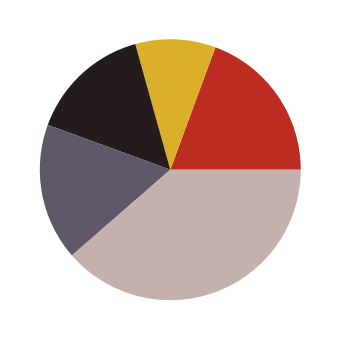

In [69]:
get_colors(df.Cover_Image_Colors.iloc[890], 5, 'Pulp_Fiction_pie_women', True)

[array([252.7717557 , 252.59287445, 250.16749052]),
 array([98.57005574, 64.95714011, 74.87545647]),
 array([156.30522828, 135.62610457, 137.6857511 ]),
 array([62.95310418, 17.37410072, 12.17452705]),
 array([203.61275426, 193.23760308, 191.76833425])]

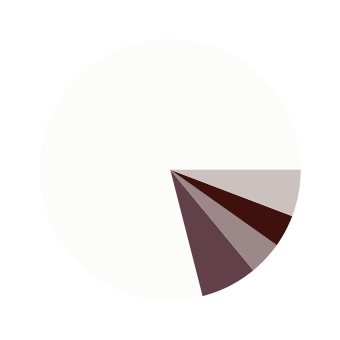

In [71]:
get_colors(df.Cover_Image_Colors.iloc[682], 5, 'Forrest_Gump_pie_men', True)

[array([206.79527426, 200.84894515, 218.15274262]),
 array([147.38021462, 145.91193092, 165.53546257]),
 array([ 99.47997402,  97.08547305, 118.95102836]),
 array([58.88119563, 53.66696189, 72.22018029]),
 array([29.82867574, 24.45251931, 29.74900604])]

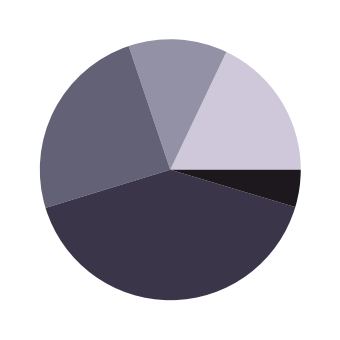

In [78]:
get_colors(df.Cover_Image_Colors.iloc[750], 5, 'Matrix_pie_men', True)

[array([71.00395002, 67.11257557, 36.89854897]),
 array([115.157328  , 111.13050314,  66.13074138]),
 array([150.37819805, 147.99623758, 107.31579211]),
 array([182.6865395 , 183.85618609, 162.19805059]),
 array([26.09232812, 26.84182245, 19.96912861])]

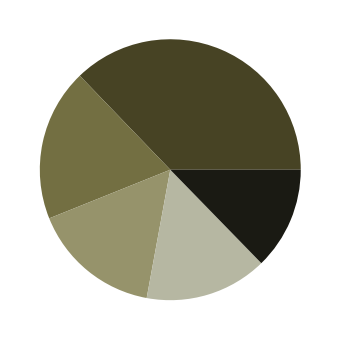

In [73]:
get_colors(df.Cover_Image_Colors.iloc[729], 5, 'LOTR_pie_men', True)

[array([250.24719736, 210.96901275,  18.28234337]),
 array([165.28690966,  95.61040987,  38.17586158]),
 array([11.12294249,  5.75279415,  2.56670392]),
 array([244.28502404, 181.68665939,  29.52423982]),
 array([226.41382657, 193.29626833, 101.74881363])]

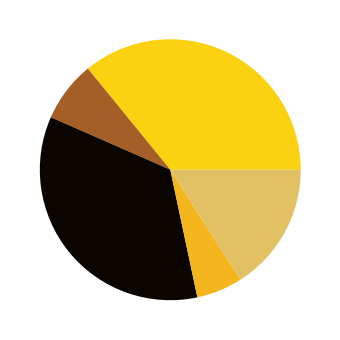

In [77]:
get_colors(df.Cover_Image_Colors.iloc[834], 5, 'Kill_Bill_pie_men', True)

In [ ]:
# provar de mirar colors per cada gènere (thriller, drama)

In [58]:
top = pd.read_csv('../Datasets/genres_top_to_bottom.csv', index_col=0)
top.head()

,Count
Genre,
Drama,946
Comedy,785
Thriller,426
Animation,349
Fantasy,331


In [59]:
top = top.iloc[:20,:]
top

,Count
Genre,
Drama,946
Comedy,785
Thriller,426
Animation,349
Fantasy,331
Documentary,314
Action,294
Adventure,261
Crime,192


In [60]:
for x in top.index:
    print(x)

Drama
Comedy
Thriller
Animation
Fantasy
Documentary
Action
Adventure
Crime
Family
Science fiction
Romance
Sequel
Terror
Kids
Superheroes
Intrigue
Friendship
Remake
Horror


In [61]:
genre = pd.DataFrame([x.split(',') for x in df.Genres])
genre.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,TV Series,Thriller,Mystery,Heist Film,Kidnapping Film / Disappearance,None,None,None,None,None,None,None
1,TV Series,Mystery,Drama,Crime,Spy Film,None,None,None,None,None,None,None
2,TV Series,Thriller,Drama,Prison Drama,None,None,None,None,None,None,None,None
3,TV Series,Action,Drama,Prison Drama,Cop Movies,None,None,None,None,None,None,None
4,TV Series,Drama,Mystery,Teen/coming-of-age,Schools & University,Bullying,None,None,None,None,None,None


In [62]:
gn = pd.DataFrame()
for x in genre.T: 
    gn = pd.concat([gn, genre.T[x]])

In [63]:
gn.head()

,0
0,TV Series
1,Thriller
2,Mystery
3,Heist Film
4,Kidnapping Film / Disappearance


In [64]:
gn[0].value_counts().head(10)

 Drama         564
Serie de TV    466
TV Series      418
 Comedia       266
Drama          265
 Thriller      254
 Comedy        178
Documental     150
 Fantasy       147
Comedia        141
Name: 0, dtype: int64

In [65]:
gn = gn.reset_index(drop=True) 
gn.head()

,0
0,TV Series
1,Thriller
2,Mystery
3,Heist Film
4,Kidnapping Film / Disappearance


In [66]:
for i in gn[0].index: 
    try: 
        gn[0][i] = gn[0][i].strip() 
    except: 
        pass

In [67]:
gn.head()

,0
0,TV Series
1,Thriller
2,Mystery
3,Heist Film
4,Kidnapping Film / Disappearance


In [68]:
gn = gn.dropna() 
gn.head(20)

,0
0,TV Series
1,Thriller
2,Mystery
3,Heist Film
4,Kidnapping Film / Disappearance
12,TV Series
13,Mystery
14,Drama
15,Crime
16,Spy Film


In [69]:
gn = gn.reset_index(drop=True) 
gn.head(20)

,0
0,TV Series
1,Thriller
2,Mystery
3,Heist Film
4,Kidnapping Film / Disappearance
5,TV Series
6,Mystery
7,Drama
8,Crime
9,Spy Film


In [70]:
top20_genres = gn.index.to_list()[0:20] 
top20_genres

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [71]:
list_genres = gn[0].to_list() 
list_genres

['TV Series',
 'Thriller',
 'Mystery',
 'Heist Film',
 'Kidnapping Film / Disappearance',
 'TV Series',
 'Mystery',
 'Drama',
 'Crime',
 'Spy Film',
 'TV Series',
 'Thriller',
 'Drama',
 'Prison Drama',
 'TV Series',
 'Action',
 'Drama',
 'Prison Drama',
 'Cop Movies',
 'TV Series',
 'Drama',
 'Mystery',
 'Teen/coming-of-age',
 'Schools & University',
 'Bullying',
 'TV Series',
 'Mystery',
 'Supernatural',
 'Kidnapping Film / Disappearance',
 'Time Travel',
 '1980s',
 'TV Series',
 'Drama',
 'Based on a Comic',
 'Teen/coming-of-age',
 'TV Series',
 'Fantasy',
 'Supernatural',
 'Based on a Comic',
 'DC Comics',
 'TV Series',
 'Drama',
 'Thriller',
 'Mafia',
 '1910s',
 '1920s',
 'Crime',
 'Neo-noir',
 'TV Series',
 'Drama',
 'Musical',
 'Revenge',
 'Telenovela / Latino Soap Opera',
 'TV Series',
 'Documentary',
 'TV Miniseries',
 'Based On A True Story',
 'Biography',
 'Sexual Abuse',
 'TV Series',
 'Sci-Fi',
 'Action',
 'Thriller',
 'Trains',
 'Post-apocalyptic Future',
 'Dystopia',
 'B

In [72]:
for element in list_genres: 
    if element == 'TV Series': 
        list_genres.remove('TV Series') 
    elif element == 'Serie de TV': 
        list_genres.remove('Serie de TV') 
    elif element == 'Miniserie de TV': 
        list_genres.remove('Miniserie de TV') 
    elif element == 'TV Movie': 
        list_genres.remove('TV Movie')

In [73]:
list_genres

['Thriller',
 'Mystery',
 'Heist Film',
 'Kidnapping Film / Disappearance',
 'Mystery',
 'Drama',
 'Crime',
 'Spy Film',
 'Thriller',
 'Drama',
 'Prison Drama',
 'Action',
 'Drama',
 'Prison Drama',
 'Cop Movies',
 'Drama',
 'Mystery',
 'Teen/coming-of-age',
 'Schools & University',
 'Bullying',
 'Mystery',
 'Supernatural',
 'Kidnapping Film / Disappearance',
 'Time Travel',
 '1980s',
 'Drama',
 'Based on a Comic',
 'Teen/coming-of-age',
 'Fantasy',
 'Supernatural',
 'Based on a Comic',
 'DC Comics',
 'Drama',
 'Thriller',
 'Mafia',
 '1910s',
 '1920s',
 'Crime',
 'Neo-noir',
 'Drama',
 'Musical',
 'Revenge',
 'Telenovela / Latino Soap Opera',
 'Documentary',
 'TV Miniseries',
 'Based On A True Story',
 'Biography',
 'Sexual Abuse',
 'Sci-Fi',
 'Action',
 'Thriller',
 'Trains',
 'Post-apocalyptic Future',
 'Dystopia',
 'Based on a Comic',
 'Drama',
 'Action',
 'Thriller',
 'Drugs',
 'Biography',
 'Crime',
 'Mafia',
 '1980s',
 'Journalism',
 'Telenovela / Latino Soap Opera',
 'Thriller',

In [74]:
list_genres2 = [] 
[list_genres2.append(x) for x in list_genres if x not in list_genres2] 
list_genres2

['Thriller',
 'Mystery',
 'Heist Film',
 'Kidnapping Film / Disappearance',
 'Drama',
 'Crime',
 'Spy Film',
 'Prison Drama',
 'Action',
 'Cop Movies',
 'Teen/coming-of-age',
 'Schools & University',
 'Bullying',
 'Supernatural',
 'Time Travel',
 '1980s',
 'Based on a Comic',
 'Fantasy',
 'DC Comics',
 'Mafia',
 '1910s',
 '1920s',
 'Neo-noir',
 'Musical',
 'Revenge',
 'Telenovela / Latino Soap Opera',
 'Documentary',
 'TV Miniseries',
 'Based On A True Story',
 'Biography',
 'Sexual Abuse',
 'Sci-Fi',
 'Trains',
 'Post-apocalyptic Future',
 'Dystopia',
 'Drugs',
 'Journalism',
 'Black Comedy',
 'Disease/illness',
 'Family Relationships',
 '1970s',
 '1990s',
 'Planes',
 'Romance',
 'Adventure',
 'Superheroes',
 'Courtroom Drama',
 'Motorcycle',
 'Psychological Thriller',
 'Anthology Series',
 'Remake',
 'Sequel',
 'Computers / Internet',
 'Comedy',
 'Sitcom',
 'Buddy Film',
 'Music Documentary',
 'Politics',
 'Martial Arts',
 'Marvel Comics',
 'Arab-Israeli conflict',
 'Terrorism',
 'Sp

In [75]:
res = pd.DataFrame() 
res['Genre'] = list_genres2 
res['GREEN_Cover'] = 0
res['BLUE_Cover'] = 0
res['RED_Cover'] = 0
res['YELLOW_Cover'] = 0
res['MAGENTA_Cover'] = 0
res['CYAN_Cover'] = 0
res['BROWN_Cover'] = 0
res['ORANGE_Cover'] = 0
res['GREY_Cover'] = 0
res['PURPLE_Cover'] = 0
res.head(10)

,Genre,GREEN_Cover,BLUE_Cover,RED_Cover,YELLOW_Cover,MAGENTA_Cover,CYAN_Cover,BROWN_Cover,ORANGE_Cover,GREY_Cover,PURPLE_Cover
0,Thriller,0,0,0,0,0,0,0,0,0,0
1,Mystery,0,0,0,0,0,0,0,0,0,0
2,Heist Film,0,0,0,0,0,0,0,0,0,0
3,Kidnapping Film / Disappearance,0,0,0,0,0,0,0,0,0,0
4,Drama,0,0,0,0,0,0,0,0,0,0
5,Crime,0,0,0,0,0,0,0,0,0,0
6,Spy Film,0,0,0,0,0,0,0,0,0,0
7,Prison Drama,0,0,0,0,0,0,0,0,0,0
8,Action,0,0,0,0,0,0,0,0,0,0
9,Cop Movies,0,0,0,0,0,0,0,0,0,0


In [76]:
for item in df.index: 
    for x in list_genres2: 
        if x in df.Genres[item]:
            for color in COLORS:
                if df[color+'_Cover'][item] == 1:
                    res[color+'_Cover'][res.Genre == x] += 1

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

In [77]:
res.head()

,Genre,GREEN_Cover,BLUE_Cover,RED_Cover,YELLOW_Cover,MAGENTA_Cover,CYAN_Cover,BROWN_Cover,ORANGE_Cover,GREY_Cover,PURPLE_Cover
0,Thriller,0,0,76,23,2,335,360,183,392,70
1,Mystery,0,0,17,5,1,61,63,37,71,14
2,Heist Film,0,0,6,2,0,14,13,9,15,3
3,Kidnapping Film / Disappearance,0,0,4,1,0,19,21,13,22,9
4,Drama,2,4,129,60,9,736,809,415,840,210


In [ ]:
res.to_csv('../Datasets/final_dataset_genres_colors.csv')

In [ ]:
res = pd.read_csv('../Datasets/final_dataset_genres_colors.csv', index_col=0)
res.head()

In [78]:
english_genre_names = {'Comedia':'Comedy','Documental':'Documentary','Crimen':'Crime', 'True Crime':'Crime',
                      'Acción':'Action', 'Intriga':'Intrigue', 'Fantástico':'Fantasy',
                      'Ciencia ficción':'Science fiction', 'Sci-Fi':'Science fiction', 
                       'Basado en hechos reales':'Based on real facts','Familia':'Family', 
                       'Biográfico': 'Biographical','Aventuras':'Adventure',
                       'Adventures':'Adventure', 'Aventuras marinas':'Adventure',
                       'Aventura espacial':'Adventure', 'Sea Adventures':'Adventure',
                       'Space Adventure':'Adventure',
                      'Adolescencia':'Adolescence','Amistad':'Friendship', 'Secuela':'Sequel',
                      'Comedia dramática':'Dramatic comedy', 'Cine familiar':'Family',
                      'Sitcom familiar':'Family', 'Family Relationships':'Family',
                      'Family-friendly':'Family', 'Family Sitcom':'Family',
                      'Animación':'Animation', 'Prison Drama':'Drama', 'Infantil':'Kids', 'Infancia':'Kids',
                      'Comedia juvenil':'Comedy', 'Comedia negra':'Comedy',
                      'Comedia de terror':'Comedy','Comedia romántica':'Comedy',
                      'Comedia absurda':'Comedy', 'Black Comedy':'Comedy','Teen Comedy':'Comedy',
                      'Comedy-Drama':'Dramatic comedy','Broad Comedy':'Comedy', 'Horror Comedy':'Comedy',
                      'Romantic Comedy':'Comedy', 'High Comedy':'Comedy','Courtroom Drama':'Drama',
                      'Romantic Drama':'Drama','Psychological Drama':'Drama','Drama de época':'Drama',
                      'Drama psicológico':'Drama','Social Drama':'Drama','Drama romántico':'Drama',
                      'Drama sureño':'Drama','Drama judicial':'Drama','Drama carcelario':'Drama',
                      'Drama social':'Drama','Sobrenatural':'Supernatural','Drogas':'Drugs',
                      'Cómic':'Based on a Comic','Policíaco':'Cop Movies','Documental sobre música':'Documentary',
                      'Documental deportivo':'Documentary','Documental científico':'Documentary',
                      'Documental marino':'Documentary','Documental sobre cine':'Documentary',
                      'Documental sobre Historia':'Documentary','Documental sobre videojuegos':'Documentary',
                      'Movie Documentary':'Documentary','Music Documentary':'Documentary',
                      'Secuestros / Desapariciones':'Kidnapping Film / Disappearance',
                      'Colegios & Universidad':'Schools & University','Animales':'Animals','Política':'Politics',
                      'Videojuego':'Based on a Video Game','Histórico':'Historical','Deporte':'Sports',
                      'Sport Documentaries':'Documentary','Fútbol':'Soccer/Football','Superhéroes':'Superheroes',
                       'DC Comics':'Superheroes','Marvel Comics':'Superheroes',
                      'Psychological Thriller':'Thriller','Thriller psicológico':'Thriller','Thriller futurista':'Thriller',
                      'Futuristic Thriller':'Thriller','Animación para adultos':'Animation','Adult Animation':'Animation',
                      'Cortometraje (animación)':'Short Film (Animated)','Venganza':'Revenge','Espionaje':'Spy Film',
                      'Iraq War':'War','II World War':'War','Spanish Civil War':'War','Spanish Post-War':'War',
                      'Cold War':'War','Guerra de Vietnam':'War','Guerra de Afganistán':'War','II Guerra Mundial':'War',
                      'Guerra Fría':'War','Guerra Civil Española':'War','Guerra de Siria':'War',
                      'I Guerra Mundial':'War','Guerra de los Balcanes':'War','Guerras Napoleónicas':'War',
                      'Guerra de Corea':'War','Guerra de Iraq':'War','Internet / Informática':'Computers / Internet',
                      'Brujería':'Witchcraft','Robos & Atracos':'Heist Film','Magia':'Magic','Magic Realism':'Magic',
                      'Música':'Music','Supervivencia':'Survival Film','Bélico':'War','Asesinos en serie':'Serial Killers',
                      'Naturaleza':'Nature','Vampiros':'Vampires','Periodismo':'Journalism',
                      'Artes marciales':'Martial Arts','Racismo':'Racism','Vejez':'Old Age','Discapacidad':'Disability',
                      'Terrorismo':'Terrorism','Inmigración':'Immigration','Zombis':'Zombies',
                      'Viajes en el tiempo':'Time Travel','Medieval Fantasy':'Fantasy','Fantasía medieval':'Fantasy',
                      'Monstruos':'Monsters','Dragones':'Dragons','Extraterrestres':'Aliens',
                      'Distopía':'Dystopia','Homosexualidad':'Gay & Lesbian','Coches / Automovilismo':'Car Movies',
                      'Religión':'Religion','Años 80':'1980s','Años 70':'1970s','Años 60':'1960s',
                      'Años 90':'1990s','Años 50':'1950s','Años 40':'1940s','Perros/Lobos':'Dogs/Wolves',
                      'Literatura':'Literature','Sátira':'Satire','3-D':'3D','Feminismo':'Feminism',
                      'Navidad':'Christmas','Película de culto':'Cult Movie','Mediometraje':'Half-length Film',
                      'Siglo XIX':'19th Century','Enfermedad':'Disease/illness','Conciertos':'Concerts',
                      'Hombres lobo':'Werewolf'}

In [79]:
res['Genre'].replace(english_genre_names, inplace=True)
res.head(20)

,Genre,GREEN_Cover,BLUE_Cover,RED_Cover,YELLOW_Cover,MAGENTA_Cover,CYAN_Cover,BROWN_Cover,ORANGE_Cover,GREY_Cover,PURPLE_Cover
0,Thriller,0,0,76,23,2,335,360,183,392,70
1,Mystery,0,0,17,5,1,61,63,37,71,14
2,Heist Film,0,0,6,2,0,14,13,9,15,3
3,Kidnapping Film / Disappearance,0,0,4,1,0,19,21,13,22,9
4,Drama,2,4,129,60,9,736,809,415,840,210
5,Crime,0,1,50,19,3,163,174,107,185,40
6,Spy Film,0,0,2,1,0,7,7,7,8,2
7,Drama,0,0,0,1,0,11,11,3,11,2
8,Action,0,1,40,16,0,144,146,93,162,35
9,Cop Movies,0,0,3,2,0,28,30,13,31,5


In [80]:
res['Genre'].value_counts()

War                         18
Comedy                      13
Drama                       13
Documentary                 12
Family                       6
                            ..
Alzheimer's                  1
Exorcism/Evil Possession     1
Colonialismo                 1
Póker                        1
Planes                       1
Name: Genre, Length: 370, dtype: int64

In [81]:
all_genres = res.groupby(['Genre']).sum()
all_genres

,GREEN_Cover,BLUE_Cover,RED_Cover,YELLOW_Cover,MAGENTA_Cover,CYAN_Cover,BROWN_Cover,ORANGE_Cover,GREY_Cover,PURPLE_Cover
Genre,,,,,,,,,,
11-S,0,0,0,0,0,1,1,0,1,0
13th Century,0,0,1,0,0,1,1,1,1,1
14th Century,0,0,0,0,0,1,1,0,1,0
15th Century,0,0,0,0,0,1,1,0,1,1
17th Century,0,0,0,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
Wrestling,0,0,0,0,0,2,2,2,2,1
Yakuza & Triada,0,0,1,0,0,2,3,2,3,0
Young Adult,0,0,0,1,0,15,14,5,16,4


In [82]:
final_genres = pd.merge(top, all_genres, how='left', left_on=top.index, right_on=all_genres.index)
final_genres

,key_0,Count,GREEN_Cover,BLUE_Cover,RED_Cover,YELLOW_Cover,MAGENTA_Cover,CYAN_Cover,BROWN_Cover,ORANGE_Cover,GREY_Cover,PURPLE_Cover
0,Drama,946,2,4,143,68,10,838,922,472,957,236
1,Comedy,785,6,6,233,129,14,715,791,597,812,302
2,Thriller,426,0,0,82,25,3,365,390,199,428,80
3,Animation,349,9,2,100,60,3,308,332,247,349,169
4,Fantasy,331,2,2,62,35,3,285,301,183,331,137
5,Documentary,314,0,1,82,34,4,269,292,183,310,93
6,Action,294,1,1,77,32,2,258,274,181,300,82
7,Adventure,261,2,1,50,37,1,243,246,157,271,100
8,Crime,192,0,2,78,37,5,265,284,171,302,67
9,Family,188,3,1,39,27,1,166,183,125,186,59


In [83]:
final_genres.iloc[0].to_frame()

,0
key_0,Drama
Count,946
GREEN_Cover,2
BLUE_Cover,4
RED_Cover,143
YELLOW_Cover,68
MAGENTA_Cover,10
CYAN_Cover,838
BROWN_Cover,922
ORANGE_Cover,472


In [84]:
final_genres.iloc[0].index

Index(['key_0', 'Count', 'GREEN_Cover', 'BLUE_Cover', 'RED_Cover',
       'YELLOW_Cover', 'MAGENTA_Cover', 'CYAN_Cover', 'BROWN_Cover',
       'ORANGE_Cover', 'GREY_Cover', 'PURPLE_Cover'],
      dtype='object')

In [85]:
def get_labels_values(df_item):
    labels = []
    values = []
    for color in COLORS:
        if df_item[color+'_Cover']:
            labels.append(color.lower())
            values.append(df_item[color+'_Cover'])
    
    return labels, values

In [86]:
labels, values = get_labels_values(final_genres.iloc[0])

In [87]:
print(labels)
print(values)

['green', 'blue', 'red', 'yellow', 'magenta', 'cyan', 'brown', 'orange', 'grey', 'purple']
[2, 4, 143, 68, 10, 838, 922, 472, 957, 236]


Text(0.5, 1.0, 'Drama')

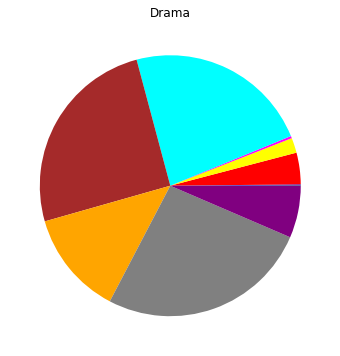

In [88]:
plt.figure(figsize = (8, 6))
plt.pie(values, colors = labels)
plt.title(final_genres.iloc[0]['key_0'])

In [89]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial',
                             marker=dict(colors=labels),
                             title_text=final_genres.iloc[0]['key_0'],
                            )])

fig.update(layout_title_text=final_genres.iloc[0]['key_0'],
           layout_showlegend=True)

fig.show()

In [116]:
labels1, values1 = get_labels_values(final_genres.iloc[5])
len(labels1)

9

In [122]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels1, values1 = get_labels_values(final_genres.iloc[0])
labels2, values2 = get_labels_values(final_genres.iloc[1])
labels3, values3 = get_labels_values(final_genres.iloc[2])
labels4, values4 = get_labels_values(final_genres.iloc[3])
labels5, values5 = get_labels_values(final_genres.iloc[4])
labels6, values6 = get_labels_values(final_genres.iloc[5])

# Create subplots, using 'domain' type for pie charts
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}], 
         [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=3, specs=specs)

# Define pie charts
fig.add_trace(go.Pie(labels=labels1, values=values1, name=final_genres.iloc[0]['key_0'],
                     marker_colors=labels1, title_text=final_genres.iloc[0]['key_0'],
                    textposition = ['none','none','none','none','none','inside','inside','inside','inside','inside']), 1, 1)
fig.add_trace(go.Pie(labels=labels2, values=values2, name=final_genres.iloc[1]['key_0'],
                     marker_colors=labels2, title_text=final_genres.iloc[1]['key_0'],
                    textposition = ['none','none','none','none','none','inside','inside','inside','inside','inside']), 1, 2)
fig.add_trace(go.Pie(labels=labels3, values=values3, name=final_genres.iloc[2]['key_0'],
                     marker_colors=labels3, title_text=final_genres.iloc[2]['key_0'],
                    textposition = ['none','none','none','inside','inside','inside','inside','none']), 1, 3)
fig.add_trace(go.Pie(labels=labels4, values=values4, name=final_genres.iloc[3]['key_0'],
                     marker_colors=labels4, title_text=final_genres.iloc[3]['key_0'],
                    textposition = ['none','none','none','none','none','inside','inside','inside','inside','inside']), 2, 1)
fig.add_trace(go.Pie(labels=labels5, values=values5, name=final_genres.iloc[4]['key_0'],
                     marker_colors=labels5, title_text=final_genres.iloc[4]['key_0'],
                    textposition = ['none','none','none','none','none','inside','inside','inside','inside','inside']), 2, 2)
fig.add_trace(go.Pie(labels=labels6, values=values6, name=final_genres.iloc[5]['key_0'],
                     marker_colors=labels6, title_text=final_genres.iloc[5]['key_0'],
                    textposition = ['none','none','none','none','inside','inside','inside','inside','inside']), 2, 3)

# Tune layout and hover info
fig.update_traces(hoverinfo='label+percent+name', textinfo='percent')
fig.update(layout_title_text='Top 6 Genres Most Prominent Colors Shown Proportionally',
           layout_showlegend=False)

fig = go.Figure(fig)
fig.show()